In [11]:
%matplotlib inline

## WARM-UP： NUMPY

我们将实现这样一个神经网络
- 一个隐层的全连接网络
- 激活函数用RuLU
- 没有偏置参数（译者：没有偏置，神经网络的拟合能力会下降许多，无法完成拟合正弦曲线这一任务，因此我们加上偏置）
- 欧氏距离作为损失函数（MSELoss）

译者：本节我们介绍如何用NumPy实现一个简单的神经网络。需要一点求导的知识，不难，但是需要动笔。神经网络的函数表达为：
$$y = ReLU(x \cdot w_1 + b_1) \cdot w_2 + b_2$$
原文中输入和输出都是随机数，这样没有一个直观的演示效果，我修改了部分代码，将题目设计为使用神经网络拟合正弦函数，并增加了演示代码。

我们需要手动地计算正向传播、损失函数、反向传播。

numpy数组是一个基本的n维数组，它没有涉及任何的深度学习知识、比如梯度、计算图。它仅仅支持最基本的数学运算。

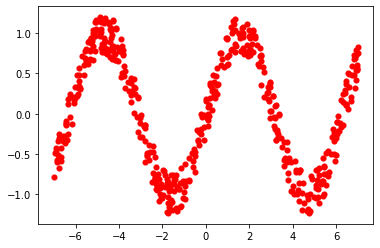

In [18]:
import numpy as np
import matplotlib.pyplot as plt
# N是batch_size； D_in是输入的维度
# H是隐层的维度；D_out是输出的维度
N, D_in, H, D_out = 512, 1, 100, 1

#创建数据集，y通过sin函数计算并加上部分噪声
x = np.random.rand(N, D_in)
x = (x - 0.5) * 14
y = np.sin(x) + (np.random.rand(N, D_out) - 0.5) * 0.5
plt.scatter(x,y,color="red", linewidth=0.1)

epoch: 0 loss: 177422.5918978643
epoch: 1000 loss: 39.94190529265245
epoch: 2000 loss: 24.658314176826853
epoch: 3000 loss: 20.542543619370775
epoch: 4000 loss: 18.273127142202306
epoch: 5000 loss: 16.838292839330578
epoch: 6000 loss: 15.801253832077787
epoch: 7000 loss: 14.917322866189952
epoch: 8000 loss: 14.214312643137628
epoch: 9000 loss: 13.710790904103995
epoch: 10000 loss: 13.316597705229864
epoch: 11000 loss: 13.000260295947934
epoch: 12000 loss: 12.734049528601549
epoch: 13000 loss: 12.509851943370439
epoch: 14000 loss: 12.31949880886606
epoch: 15000 loss: 12.164163146396966
epoch: 16000 loss: 12.03224310665885
epoch: 17000 loss: 11.918166772213514
epoch: 18000 loss: 11.823526511214151
epoch: 19000 loss: 11.742337837038875
epoch: 20000 loss: 11.673133524903394
epoch: 21000 loss: 11.612290376719638
epoch: 22000 loss: 11.55843062167326
epoch: 23000 loss: 11.5092515089929
epoch: 24000 loss: 11.4661465872252
epoch: 25000 loss: 11.428324439175098
epoch: 26000 loss: 11.393867460457

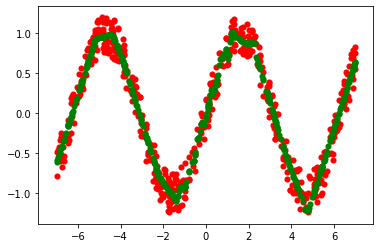

In [19]:
# 初始化权重
w1 = np.random.randn(D_in, H)
b1 = np.random.randn(H)
w2 = np.random.randn(H, D_out)
b2 = np.random.randn(D_out)
#设置学习率
learning_rate_w = 1e-6
learning_rate_b = 1e-5
for epoch in range(50000):
    # 正向传播
    h1 = x.dot(w1) + b1
    h2 = np.maximum(h1, 0)
    y_pred = h2.dot(w2) + b2

    
    # 计算loss
    loss = np.square(y_pred - y).sum()
    if epoch % 1000 == 0:
        print("epoch:",epoch, "loss:", loss)
        np.savez('./two_layers_net.npz', w1=w1, b1=b1, w2=w2, b2=b2)
    
    # 求导
    dy = 2.0 * (y_pred - y)
    dw2 = h2.T.dot(dy)
    db2 = dy.sum(axis=0)
    dh2 = dy.dot(w2.T)
    dh1 = dh2.copy()
    dh1[h1 < 0] = 0
    dw1 = x.T.dot(dh1)
    db1 = dh1.sum(axis=0)

    # 更新权重
    w1 = w1 - learning_rate_w * dw1
    b1 = b1 - learning_rate_b * db1
    w2 = w2 - learning_rate_w * dw2
    b2 = b2 - learning_rate_b * db2
    
np.savez('./two_layers_net.npz', w1=w1, b1=b1, w2=w2, b2=b2)
h1 = x.dot(w1) + b1
h2 = np.maximum(h1, 0)
y_pred = h2.dot(w2) + b2
plt.scatter(x,y,color="red", linewidth=0.1)
plt.scatter(x, y_pred, color='green', linewidth=0.1)

In [20]:
weights = np.load('./two_layers_net.npz')
w1 = weights['w1']
b1 = weights['b1']
w2 = weights['w2']
b2 = weights['b2']

def forward(x):
    h1 = x.dot(w1) + b1
    h2 = np.maximum(h1, 0)
    y_pred = h2.dot(w2) + b2
    return y_pred

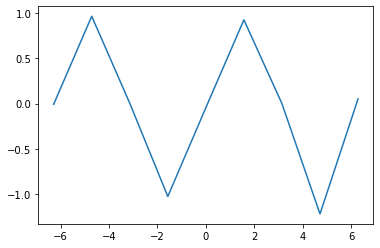

In [29]:
p = np.pi
x_test = np.ones((9, 1))
for i in range(-4, 5, 1):
    x_test[i+4, 0] = i / 2 * p

y_groundtruth = np.sin(x_test)
y_test = forward(x_test)
plt.plot(x_test, y_test)

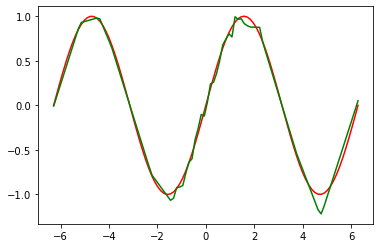

In [28]:
x_ = np.linspace(-2*p, 2*p, num=100)
x_ = x_.reshape((100, 1))
y_true = np.sin(x_)
y_ = forward(x_)
plt.plot(x_, y_true, color='r')
plt.plot(x_, y_, color='g')